In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline


In [2]:
df=pd.read_csv('heart_final_dataset-DM.csv')
df.head()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


([<matplotlib.patches.Wedge at 0x1679e7c0d60>,
 [Text(-0.04550175175760134, 1.0990585018946852, 'Heart risk'),
  Text(0.04550175175760096, -1.0990585018946852, 'Healthy')],
 [Text(-0.024819137322328003, 0.5994864555789191, '51.3%'),
  Text(0.024819137322327794, -0.5994864555789191, '48.7%')])

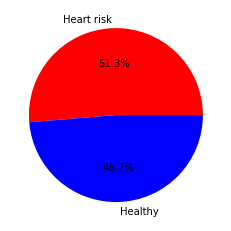

In [54]:
plt.pie(df['target'].value_counts(), labels=['Heart risk','Healthy'], colors=['red','blue'], autopct='%1.1f%%', radius=1.0)

<AxesSubplot:xlabel='age', ylabel='Count'>

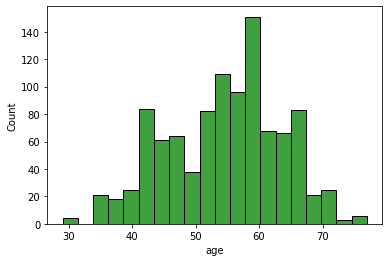

In [22]:
sns.histplot(df['age'], bins= 20,color=['green'])

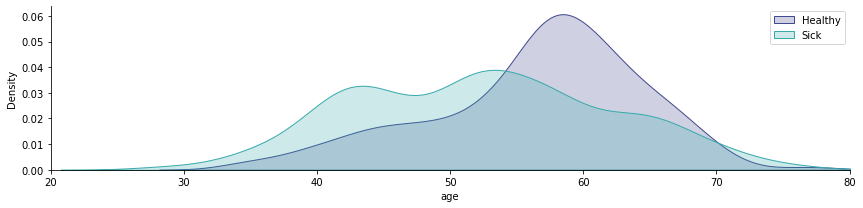

In [66]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy' , 'Sick'])

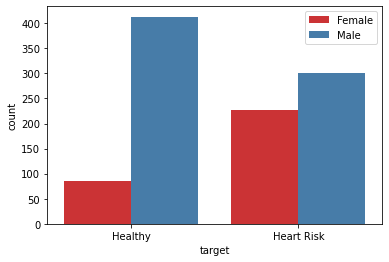

In [70]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex', palette='Set1')
fig.set_xticklabels(labels=['Healthy', 'Heart Risk'])
plt.legend(['Female', 'Male'])

[Text(0, 0, 'chest pain 0'),
 Text(1, 0, 'chest pain 1'),
 Text(2, 0, 'chest pain 2'),
 Text(3, 0, 'chest pain 3')]

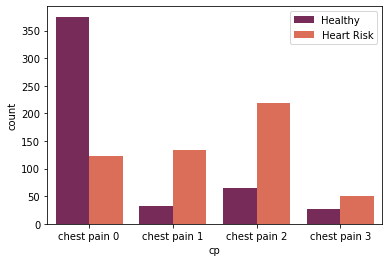

In [75]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target', palette='rocket')
plt.legend(['Healthy', 'Heart Risk'])
fig.set_xticklabels(labels=['chest pain 0', 'chest pain 1', 'chest pain 2', 'chest pain 3'])

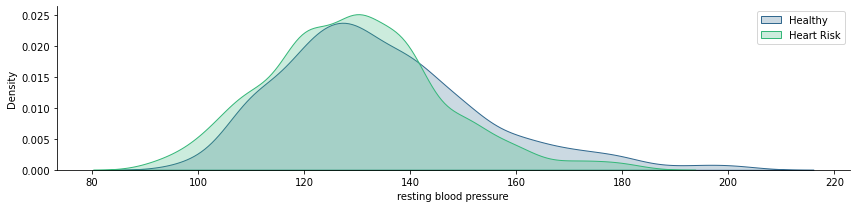

In [77]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='viridis')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Healthy' , 'Heart Risk'])
fig.set(xlabel = 'resting blood pressure')

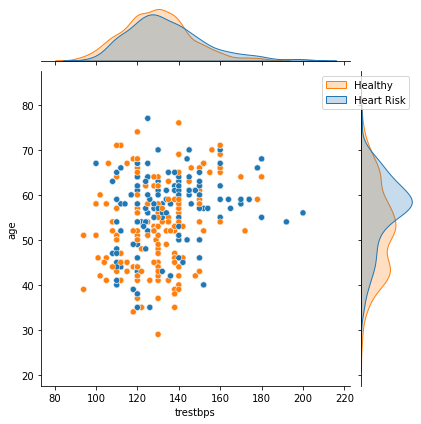

In [84]:
sns.jointplot(data=df, x='trestbps', y='age', hue='target', kind='scatter', legend=False)
plt.legend(labels=['Healthy' , 'Heart Risk'])

[Text(0, 0, 'low blood sugar'), Text(1, 0, 'high blood sugar')]

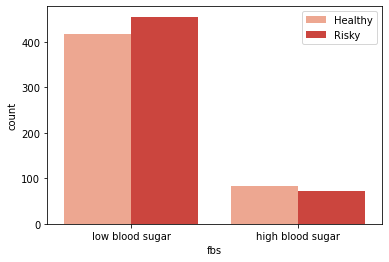

In [85]:
fig = sns.countplot(x = 'fbs', data = df, hue = 'target', palette='Reds')
plt.legend(['Healthy', 'Risky'])
fig.set_xticklabels(labels=[ 'low blood sugar','high blood sugar'])

[Text(0, 0, 'normal'),
 Text(1, 0, 'abnormal'),
 Text(2, 0, 'Ventricular hypertrophy')]

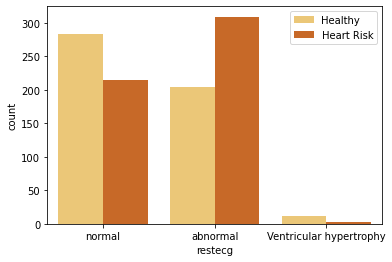

In [87]:
fig = sns.countplot(x = 'restecg', data = df, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Heart Risk'])
fig.set_xticklabels(labels=[ 'normal','abnormal', 'Ventricular hypertrophy'])

[Text(0, 0, 'healthy'), Text(1, 0, 'heart risk')]

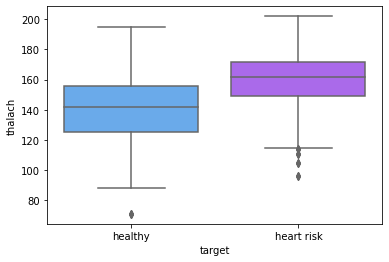

In [90]:
fig = sns.boxplot(data=df, x='target', y='thalach', palette='cool')
fig.set_xticklabels(labels=[ 'healthy','heart risk'])

[Text(0, 0, 'no angina'), Text(1, 0, 'with angina')]

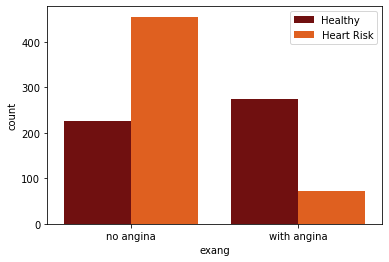

In [96]:
fig = sns.countplot(x = 'exang', data = df, hue = 'target', palette='gist_heat')
plt.legend(['Healthy', 'Heart Risk'])
fig.set_xticklabels(labels=[ 'no angina','with angina'])

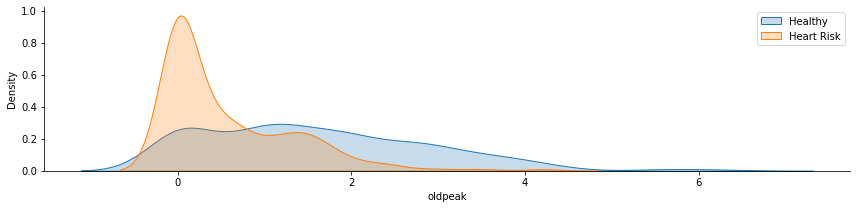

In [101]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='tab10')
fig.map(sns.kdeplot,'oldpeak',shade= True)
plt.legend(labels=['Healthy' , 'Heart Risk'])

[Text(0, 0, 'unsloping'), Text(1, 0, 'flat'), Text(2, 0, 'downsloping')]

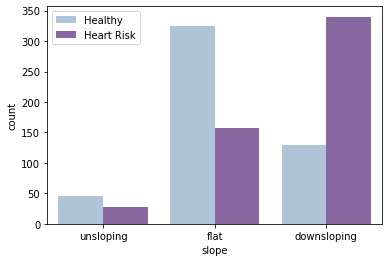

In [102]:
fig = sns.countplot(x = 'slope', data = df, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Heart Risk'])
fig.set_xticklabels(labels=[ 'unsloping','flat', 'downsloping'])

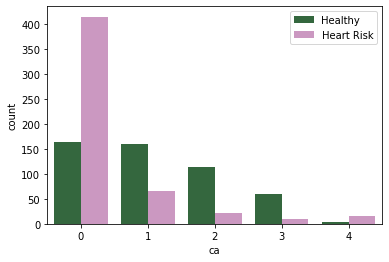

In [104]:
fig = sns.countplot(x = 'ca', data = df, hue = 'target', palette='cubehelix')
plt.legend(['Healthy', 'Heart Risk'])

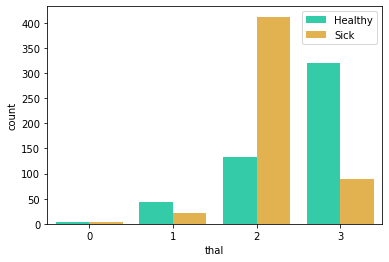

In [106]:
fig = sns.countplot(x = 'thal', data = df, hue = 'target', palette='turbo')
plt.legend(['Healthy', 'Sick'])

<AxesSubplot:>

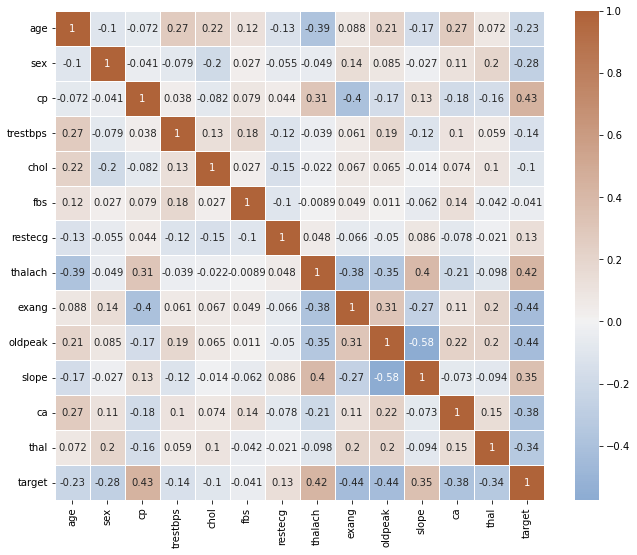

In [7]:
corr = df.corr()
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5,annot=True)

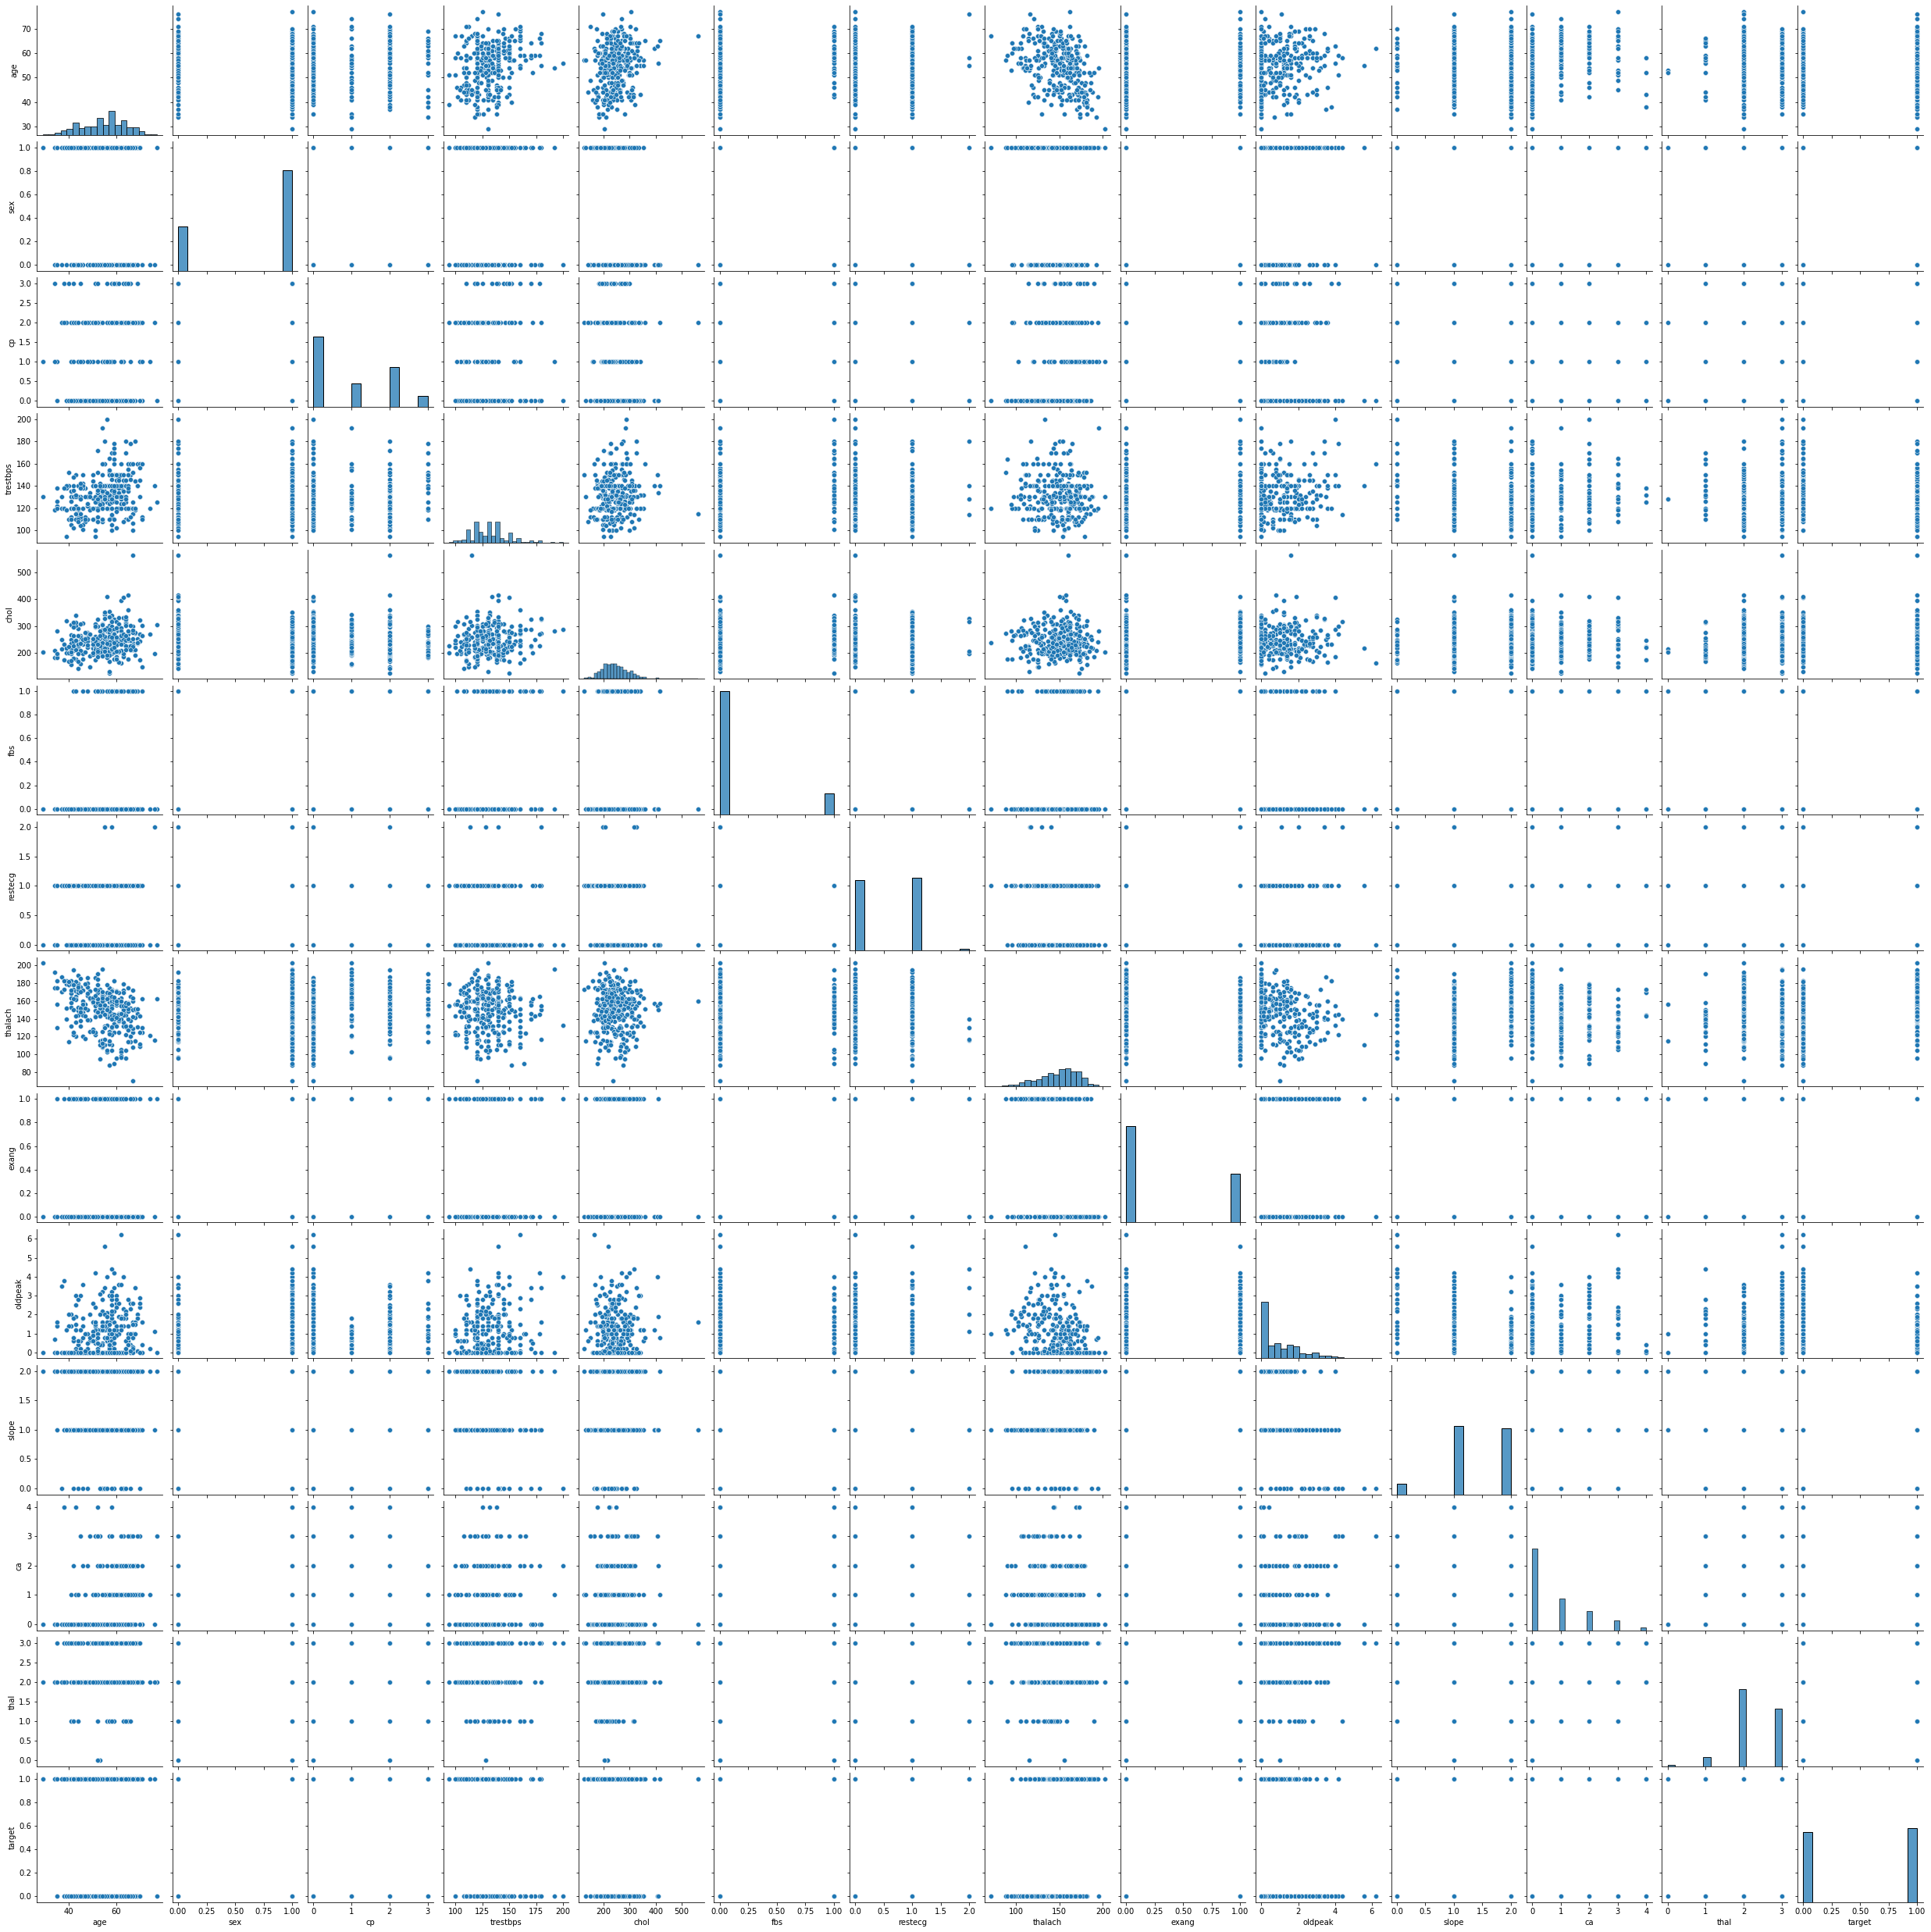

In [6]:
sns.pairplot(df)

In [3]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(df)
heart_df_constant.head()

C:\Users\shrut\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1.0,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,1.0,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,1.0,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,1.0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(df.target,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4938
Time:                        18:40:41   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.257     -7.197      0.000      -2.349      -1.344
cp             0.8546      0.100      8.516      0.000       0.658       1.051
trestbps      -0.0182      0.006     -3.245      0.001      -0.029      -0.007
chol          -0.0057      0.002     -2.757      0.006      -0.010      -0.002
fbs           -0.1012      0.285     -0.355      0.723      -0.659       0.457
restecg        0.4132      0.189      2.187      0.029       0.043       0.784
thalach        0.0236      0.006      4.158      0.000       0.012       0.035
exang         -0.9908      0.224     -4.418      0.000      -1.430      -0.551
oldpeak       -0.5707      0.116     -4.920      0.000      -0.798      -0.343
slope          0.5341      0.189      2.831      0.005       0.164       0.904
ca            -0.7545      0.103     -7.321      0.000      -0.956      -0.553
thal          -0.8861      0.156     -5.693      0.000      -1.191      -0.581
==============================================================================
"""

In [7]:
def back_feature_elem (data_frame,dep_var,col_list):
     while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,df.target,cols)

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1013
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.4934
Time:                        18:42:43   Log-Likelihood:                -359.75
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                3.740e-143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1815      1.159      2.746      0.006       0.910       5.453
sex           -1.8340      0.254     -7.216      0.000      -2.332      -1.336
cp             0.8457      0.098      8.592      0.000       0.653       1.039
trestbps      -0.0193      0.005     -3.553      0.000      -0.030      -0.009
chol          -0.0059      0.002     -2.928      0.003      -0.010      -0.002
restecg        0.4284      0.188      2.277      0.023       0.060       0.797
thalach        0.0251      0.005      4.808      0.000       0.015       0.035
exang         -0.9904      0.223     -4.441      0.000      -1.427      -0.553
oldpeak       -0.5645      0.115     -4.894      0.000      -0.791      -0.338
slope          0.5414      0.188      2.885      0.004       0.174       0.909
ca            -0.7659      0.102     -7.545      0.000      -0.965      -0.567
thal          -0.8768      0.152     -5.750      0.000      -1.176      -0.578
==============================================================================
"""

In [9]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const         2.485288     233.365715   24.082796   0.006
sex           0.097090       0.262943    0.159778   0.000
cp            1.920932       2.825459    2.329703   0.000
trestbps      0.970446       0.991369    0.980852   0.000
chol          0.990128       0.998038    0.994075   0.003
restecg       1.061542       2.219033    1.534795   0.023
thalach       1.014953       1.035902    1.025374   0.000
exang         0.239913       0.575027    0.371425   0.000
oldpeak       0.453596       0.712920    0.568663   0.000
slope         1.189631       2.482216    1.718406   0.004
ca            0.381046       0.567259    0.464921   0.000
thal          0.308622       0.561085    0.416129   0.000


In [23]:
# Splitting data to train and test split

import sklearn
new_features=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [24]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [25]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8439024390243902

<AxesSubplot:>

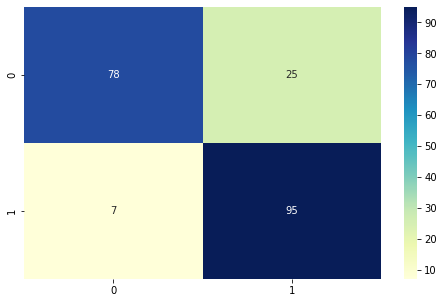

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm)
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [27]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [28]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8439024390243902 
 The Missclassification = 1-Accuracy =  0.15609756097560978 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9313725490196079 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.7572815533980582 
 Positive Predictive value = TP/(TP+FP) =  0.7916666666666666 
 Negative predictive Value = TN/(TN+FN) =  0.9176470588235294 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.8372549019607844 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.09062342885872295


In [29]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.159088,0.840912
1,0.427667,0.572333
2,0.673957,0.326043
3,0.986287,0.013713
4,0.400532,0.599468


In [30]:
#Lower the threshold

from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[51 52]
 [ 4 98]] 
 with 149 correct predictions and 4 Type II errors( False Negatives) 

 Sensitivity:  0.9607843137254902 Specificity:  0.49514563106796117 



With 0.2 threshold the Confusion Matrix is  
 [[62 41]
 [ 5 97]] 
 with 159 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.9509803921568627 Specificity:  0.6019417475728155 



With 0.3 threshold the Confusion Matrix is  
 [[69 34]
 [ 5 97]] 
 with 166 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.9509803921568627 Specificity:  0.6699029126213593 



With 0.4 threshold the Confusion Matrix is  
 [[75 28]
 [ 6 96]] 
 with 171 correct predictions and 6 Type II errors( False Negatives) 

 Sensitivity:  0.9411764705882353 Specificity:  0.7281553398058253 





C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From

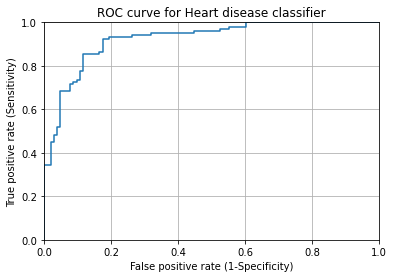

In [31]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [32]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9237578526556254

In [81]:
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [104]:
def conf(algo_name,x_test, y_test):
    y_pred = algo_name.predict(x_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [117]:
### RANDOM FOREST
# Train: Random Forest

x = df.iloc[:,0:13].values
y = df.iloc[:,13].values
results_test = {}
results_train = {}
list_algos=[]
def prdict_date(algo_name,x_train,y_train,x_test,y_test,atype='',verbose=0):
    algo_name.fit(x_train, y_train)
    Y_pred = algo_name.predict(x_test)
    acc_train = round(algo_name.score(x_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(x_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_date(random_forest,x_train,y_train,x_test,y_test)
y_pred_random=random_forest.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred_random)

acc train: 100.0
acc test: 100.0


1.0

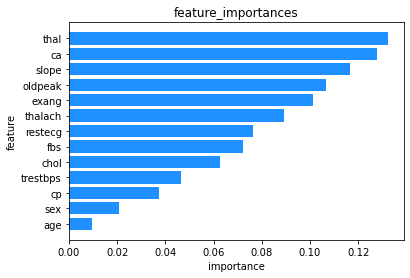

In [83]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [79]:
%pip install mlxtend --upgrade
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def sfs_features(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5)
    return sfs_name

Note: you may need to restart the kernel to use updated packages.


In [106]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a
sfs_1=sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(x, y)
selectedFeatures = print_fitures(sfs_1)


x_train_sfs = sfs_1.transform(x_train)
x_test_sfs = sfs_1.transform(x_test)

print ("\n")
prdict_date(random_forest,x_train_sfs,y_train,x_test_sfs,y_test,'sfs')

Selected features: (0, 1, 2, 4, 7)
age
sex
cp
chol
thalach


acc train: 100.0
acc test: 98.54


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       103
           1       0.97      1.00      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


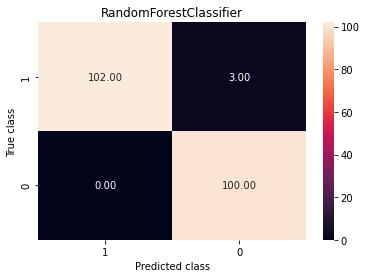

In [107]:
print(classification_report(y_test, random_forest.predict(x_test_sfs)))
conf(random_forest,x_test_sfs, y_test)

C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be remove

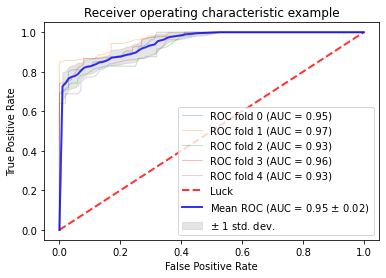

In [86]:
roc_graph_cv(random_forest,x[:,selectedFeatures],y)

In [116]:
### DECISION TREE
#  descion tree
dect = tree.DecisionTreeClassifier()
prdict_date(dect,x_train,y_train,x_test,y_test)
y_pred_decision=dect.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred_decision)

acc train: 100.0
acc test: 98.54


0.9853658536585366

In [111]:
sfs_1=sfs_features(dect,(1,5))
sfs_1 = sfs_1.fit(x, y)
selectedFeatures = print_fitures(sfs_1)

x_train_sfs = sfs_1.transform(x_train)
x_test_sfs = sfs_1.transform(x_test)

prdict_date(dect,x_train_sfs,y_train,x_test_sfs,y_test,'sfs')

Selected features: (2, 4, 6, 7, 11)
cp
chol
restecg
thalach
ca
acc train: 100.0
acc test: 100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


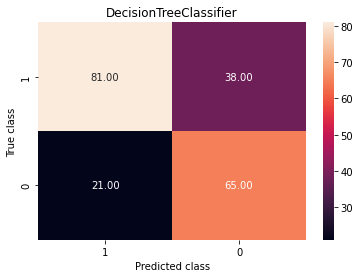

In [112]:
print(classification_report(y_test, dect.predict(x_test_sfs)))
conf(dect,X_test_sfs, y_test)

C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be remove

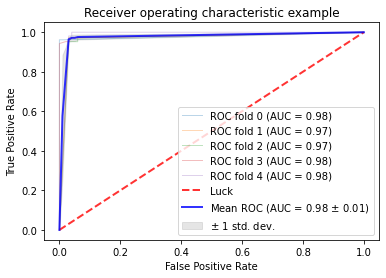

In [93]:
roc_graph_cv(dect,x[:,selectedFeatures],y)

The optimal number of neighbors is 2 with 71.7%


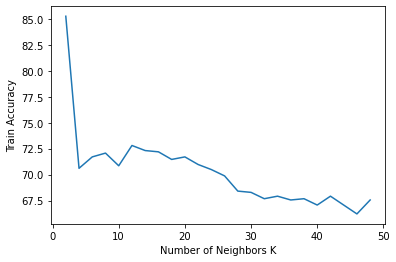

In [96]:
#### KNN 
##to choose the right K we build a loop witch examen all the posible values for K. 
from sklearn import model_selection

#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

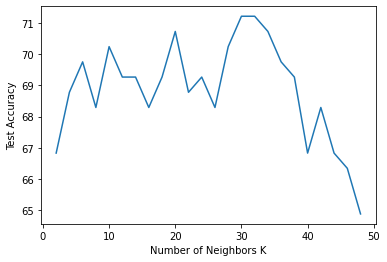

In [98]:
cv_preds = []

#Perform 10-fold cross validation on testing set for odd values of k
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    preds = model_selection.cross_val_predict(knn, x_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))

optimal_k = neighbors[cv_preds.index(max(cv_preds))]


plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [115]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 6)
prdict_date(knn,x_train,y_train,x_test,y_test)
y_pred_knn=knn.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred_knn)


acc train: 83.41
acc test: 74.63


0.7463414634146341

Selected features: (2, 5, 7, 8, 11)
cp
fbs
thalach
exang
ca
acc train: 88.54
acc test: 84.39
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.87      0.80      0.84       102

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


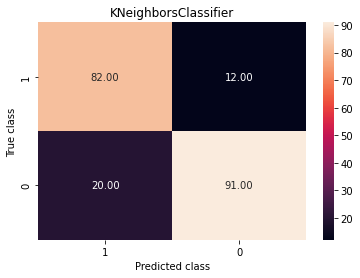

In [102]:
def conf(algo_name,x_test, y_test):
    y_pred = algo_name.predict(x_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])
sfs_1=sfs_features(knn,(1,5))
sfs_1 = sfs_1.fit(x, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(x_train)
X_test_sfs = sfs_1.transform(x_test)

prdict_date(knn,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, knn.predict(X_test_sfs)))
conf(knn,X_test_sfs, y_test)

C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\shrut\AppData\Local\Temp/ipykernel_6656/3315163465.py:36: DeprecationWarning: scipy.interp is deprecated and will be remove

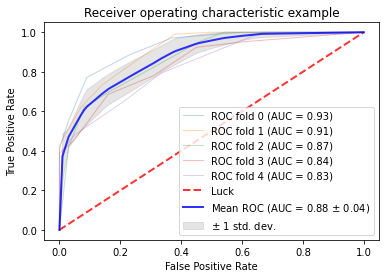

In [103]:
roc_graph_cv(knn,x[:,selectedFeatures],y)